<a href="https://colab.research.google.com/github/goulartsursula/iniciacao-cientifica/blob/master/notebooks/boson_de_higgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Data for later use.

csvs = [pd.read_csv('https://raw.githubusercontent.com/goulartsursula/cms-jupyter-materials-english/master/Data/4mu_2011.csv'), pd.read_csv('https://raw.githubusercontent.com/goulartsursula/cms-jupyter-materials-english/master/Data/4e_2011.csv'), pd.read_csv('https://raw.githubusercontent.com/goulartsursula/cms-jupyter-materials-english/master/Data/2e2mu_2011.csv')]
csvs += [pd.read_csv('https://raw.githubusercontent.com/goulartsursula/cms-jupyter-materials-english/master/Data/4mu_2012.csv'), pd.read_csv('https://raw.githubusercontent.com/goulartsursula/cms-jupyter-materials-english/master/Data/4e_2012.csv'), pd.read_csv('https://raw.githubusercontent.com/goulartsursula/cms-jupyter-materials-english/master/Data/2e2mu_2012.csv')]

fourlep = pd.concat(csvs)

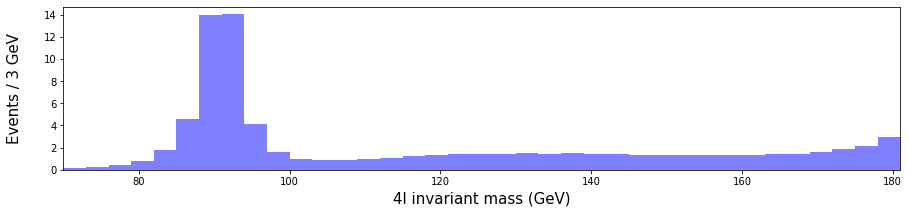

In [6]:
# Let's set some values here in regards to the region we're looking at.

rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(fourlep['M'], bins = nbins, range = (rmin,rmax))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])

# ZZ, a pair of heavier bosons.

plt.figure(figsize = (15,3))
plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black', alpha = 0.5)

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

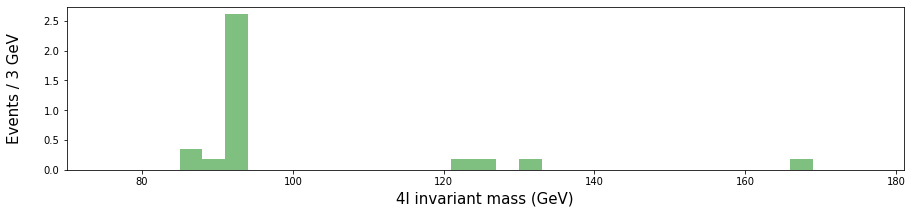

In [7]:
# DY, some irreducible background from singular Z bosons.

plt.figure(figsize = (15,3))
plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black', alpha = 0.5)

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

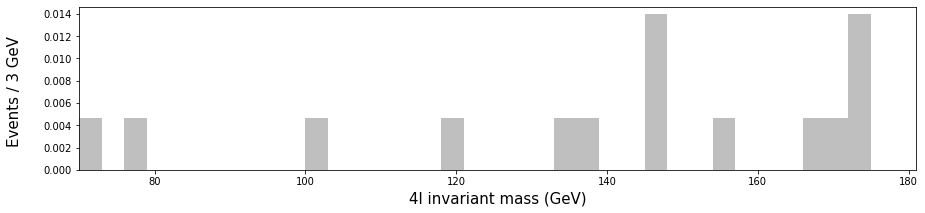

In [8]:
# ttbar, a pair of top and anti-top quarks.

plt.figure(figsize = (15,3))
plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b', alpha = 0.5)

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV \n', fontsize = 15)
plt.xlim(rmin,rmax)
plt.show()

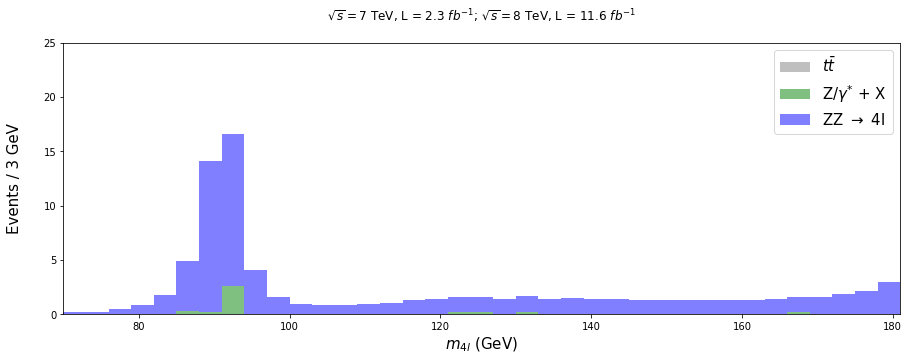

In [9]:
plt.figure(figsize = (15,5))

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

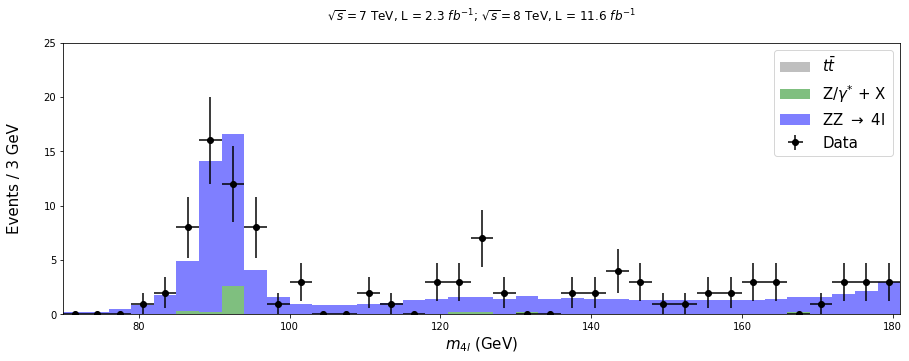

In [10]:
plt.figure(figsize = (15,5))

xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# Measured data
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

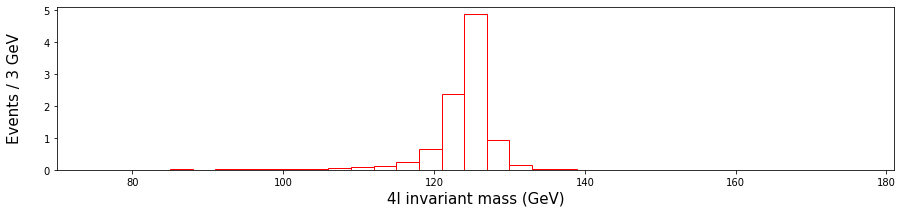

In [16]:
# HZZ, our theoretical assumption of a Higgs via two Z bosons.

plt.figure(figsize = (15,3))
plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r')

plt.xlabel('4l invariant mass (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.xlim(rmin, rmax)
#plt.xlim(110,140)
plt.show()

`Bonus question: how can something, that seems to have a mass of roughly 125 GeV decay via two Z bosons, with mass over 90 GeV?`

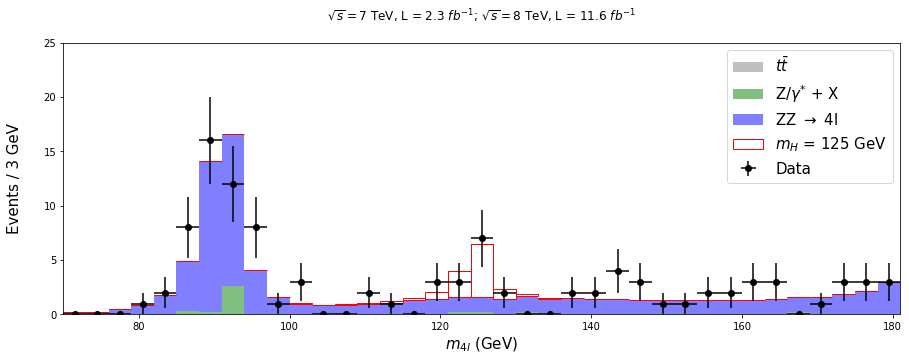

In [14]:
plt.figure(figsize = (15,5))

# ttbar 
ttbar_bar = plt.bar(center, ttbar, align = 'center', width = width, color = 'gray', linewidth = 0, edgecolor = 'b',
                    alpha = 0.5, label = r'$t\bar{t}$')

# DY
dy_bar = plt.bar(center, dy, align = 'center', width = width, color = 'g', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar, label = 'Z/$\gamma^{*}$ + X')

# ZZ
zz_bar = plt.bar(center, zz, align = 'center', width = width, color = 'b', linewidth = 0, edgecolor = 'black',
                 alpha = 0.5, bottom = ttbar+dy, label = r'ZZ $\rightarrow$ 4l')

# HZZ
hzz_bar = plt.bar(center, hzz, align = 'center', width = width, color = 'w', linewidth = 1, edgecolor = 'r',
                  bottom = ttbar+dy+zz, label = '$m_{H}$ = 125 GeV')

# Measured data
data_bar = plt.errorbar(center, hist, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 12)
plt.xlabel('$m_{4l}$ (GeV)', fontsize = 15)
plt.ylabel('Events / 3 GeV\n', fontsize = 15)
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.legend(fontsize = 15)

plt.show()

In [15]:
pd.options.display.max_columns = 50
fourlep.head()

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,PID2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,PID3,E3,px3,py3,pz3,pt3,eta3,phi3,Q3,PID4,E4,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,173657,34442568,13,35.9978,32.7631,-4.41922,-14.2436,33.0598,-0.418519,-0.134075,-1,-13,29.0804,-19.31050,-5.31425,21.0837,20.0284,0.918146,-2.873040,1,13,17.3154,-10.87010,-3.64596,12.9753,11.46530,0.971505,-2.81797,-1,-13,11.49390,-1.20978,11.35650,1.29029,11.42070,0.112739,1.676920,1,62.5513,20.5205,91.4517
1,166512,337493970,13,52.9826,-49.9170,8.17082,15.7696,50.5813,0.306925,2.979340,-1,13,72.1018,15.32840,21.35470,-67.1392,26.2866,-1.667150,0.948222,-1,-13,89.7552,10.34670,-20.27240,86.8214,22.76010,2.048740,-1.09888,1,-13,30.21620,2.32913,-13.06840,27.14400,13.27430,1.463510,-1.394420,1,92.1352,90.2049,235.8800
2,171091,69105221,13,165.9750,-12.6280,-30.22890,162.7100,32.7605,2.305880,-1.966510,-1,-13,68.1611,6.93837,22.85760,63.8382,23.8875,1.709440,1.276090,1,-13,19.5056,4.71517,8.50412,16.9087,9.72383,1.320370,1.06454,1,13,24.83870,-8.09683,3.05681,23.28190,8.65464,1.715610,2.780600,-1,58.3874,14.3541,79.3858
3,172952,559839432,13,110.2600,-69.1510,68.83630,-51.3524,97.5720,-0.504613,2.358470,-1,13,88.3199,85.94400,-16.81970,-11.4510,87.5743,-0.130388,-0.193263,-1,-13,45.0987,-19.98280,-29.14080,-28.0247,35.33410,-0.727298,-2.17188,1,-13,9.79377,3.02072,8.34856,-4.13324,8.87824,-0.450186,1.223630,1,91.1877,37.3758,232.9290
4,167282,44166176,-13,54.3881,-27.4999,-43.86520,-16.6628,51.7726,-0.316533,-2.130770,1,13,39.8417,31.53530,18.85330,15.4088,36.7413,0.407975,0.538835,-1,-13,20.3208,3.30081,16.01250,12.0677,16.34910,0.683619,1.36750,1,13,6.83735,4.64276,-2.38618,4.41465,5.22007,0.767963,-0.474752,-1,90.7513,14.7350,119.2900
